In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../../../Data/Combo_4_DropNAs.csv')

In [3]:
data

,Risk_Score,DI,Loan Type,Employment Length,Accepted
0,677.0,0.065455,Debt Consolidation,10+ years,1
1,717.0,0.380000,Business Loan,10+ years,1
2,697.0,0.317460,Home Improvement,10+ years,1
3,787.0,0.318182,Debt Consolidation,10+ years,1
4,697.0,0.099585,Major Purchase,3 years,1
...,...,...,...,...,...
11105947,681.0,0.551500,Debt Consolidation,< 1 year,0
11105948,531.0,0.313100,Debt Consolidation,< 1 year,0
11105949,590.0,0.412600,Debt Consolidation,< 1 year,0
11105950,686.0,0.102600,Other,< 1 year,0


In [4]:
data.dtypes

Risk_Score           float64
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

In [5]:
cat_features = ['Loan Type', 'Employment Length']
print(cat_features)

['Loan Type', 'Employment Length']


In [6]:
y = data.Accepted
X = data.drop('Accepted', axis=1)
print (y.shape)
print (X.shape)

(11105952,)
(11105952, 4)


In [7]:
print('Labels: {}'.format(set(y)))
print('Zero count = {}, One count = {}'.format(len(y) - sum(y), sum(y)))
print('Ratio of One Count = {}'.format(sum(y)/len(y)))

Labels: {0, 1}
Zero count = 8992195, One count = 2113757
Ratio of One Count = 0.1903265024015951


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y)
print('Labels: {}'.format(set(y_train)))
print('Zero count (Train) = {}, One count (Train) = {}'.format(len(y_train) - sum(y_train), sum(y_train)))
print('Ratio of One Count = {}'.format(sum(y_train)/len(y_train)))
print('Ratio of Train to Test = {}'.format(len(y_train)/(len(y_train)+len(y_test))))
#print('Ratio of Train to Test = {}'.format(len(X_train)/(len(X_train)+len(X_test))))

Labels: {0, 1}
Zero count (Train) = 6294536, One count (Train) = 1479630
Ratio of One Count = 0.19032652505747882
Ratio of Train to Test = 0.6999999639832767


In [9]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)

In [20]:
print('Labels: {}'.format(set(y_train_os)))
print('Zero count = {}, One count = {}'.format(len(y_train_os) - sum(y_train_os), sum(y_train_os)))
print('Ratio of One Count = {}'.format(sum(y_train_os)/len(y_train_os)))
#print('Ratio of Train to Test = {}'.format(len(y_train_os)/(len(y_train_os)+len(y_test))))

Labels: {0, 1}
Zero count = 6294536, One count = 6294536
Ratio of One Count = 0.5


In [21]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=100)
cb.fit(X_train_os, y_train_os, cat_features = cat_features, verbose = 10)

Learning rate set to 0.5
0:	learn: 0.3946816	total: 1.71s	remaining: 2m 49s
10:	learn: 0.1343690	total: 9.88s	remaining: 1m 19s
20:	learn: 0.1000296	total: 17.2s	remaining: 1m 4s
30:	learn: 0.0835875	total: 24.8s	remaining: 55.1s
40:	learn: 0.0780461	total: 32.3s	remaining: 46.5s
50:	learn: 0.0748730	total: 39.7s	remaining: 38.1s
60:	learn: 0.0729945	total: 47s	remaining: 30s
70:	learn: 0.0713870	total: 54.2s	remaining: 22.2s
80:	learn: 0.0701932	total: 1m 1s	remaining: 14.4s
90:	learn: 0.0694562	total: 1m 9s	remaining: 6.83s
99:	learn: 0.0687987	total: 1m 15s	remaining: 0us


In [26]:
from catboost import Pool
#pool = Pool(data=X, label=y, cat_features = cat_features)

In [27]:
train_pool = Pool(data=X_train_os, label=y_train_os, cat_features=cat_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=cat_features)

In [28]:
cb.fit(train_pool, eval_set=test_pool, verbose=10)
#Log Loss is the "default optimizer for binary classification in CatBoost"

Learning rate set to 0.5
0:	learn: 0.3946816	test: 0.3967321	best: 0.3967321 (0)	total: 1.89s	remaining: 3m 7s
10:	learn: 0.1343690	test: 0.1438828	best: 0.1438828 (10)	total: 10.9s	remaining: 1m 28s
20:	learn: 0.1000296	test: 0.1077457	best: 0.1077457 (20)	total: 19.2s	remaining: 1m 12s
30:	learn: 0.0835875	test: 0.0905605	best: 0.0905605 (30)	total: 27.2s	remaining: 1m
40:	learn: 0.0780461	test: 0.0862513	best: 0.0862513 (40)	total: 35.2s	remaining: 50.6s
50:	learn: 0.0748730	test: 0.0839669	best: 0.0839669 (50)	total: 42.9s	remaining: 41.2s
60:	learn: 0.0729945	test: 0.0824931	best: 0.0824931 (60)	total: 50.4s	remaining: 32.2s
70:	learn: 0.0713870	test: 0.0810185	best: 0.0810185 (70)	total: 57.8s	remaining: 23.6s
80:	learn: 0.0701932	test: 0.0802128	best: 0.0802128 (80)	total: 1m 5s	remaining: 15.4s
90:	learn: 0.0694562	test: 0.0796326	best: 0.0796326 (90)	total: 1m 13s	remaining: 7.26s
99:	learn: 0.0687987	test: 0.0790256	best: 0.0790256 (99)	total: 1m 20s	remaining: 0us

bestTest 

In [29]:
print('Model is fitted: {}'.format(cb.is_fitted()))
print('Model params:\n{}'.format(cb.get_params()))

Model is fitted: True
Model params:
{'iterations': 100}


In [30]:
cb2 = CatBoostClassifier(iterations=100, custom_loss=['AUC', 'Accuracy'])

cb2.fit(train_pool, eval_set = test_pool, verbose=False, plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [31]:
import shap

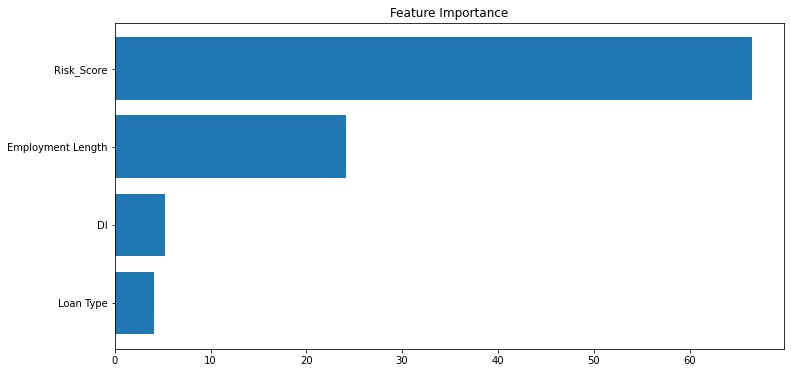

In [32]:
feature_importance = cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance');

In [33]:
feature_importance

array([66.56211669,  5.27449742,  4.07252497, 24.09086092])

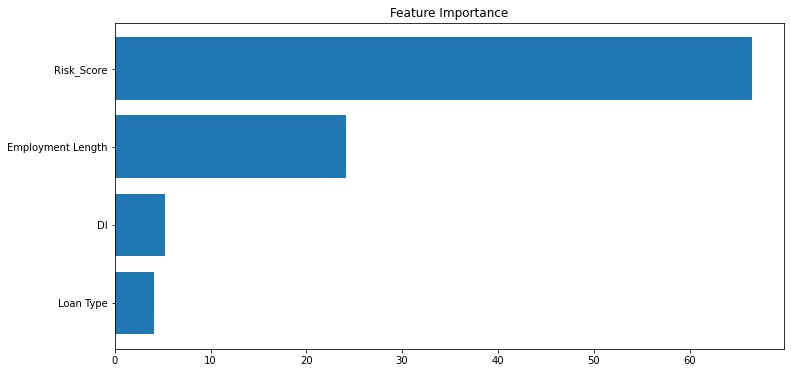

In [34]:
feature_importance = cb2.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance');

Text(0.5, 1.0, 'SHAP Importance')

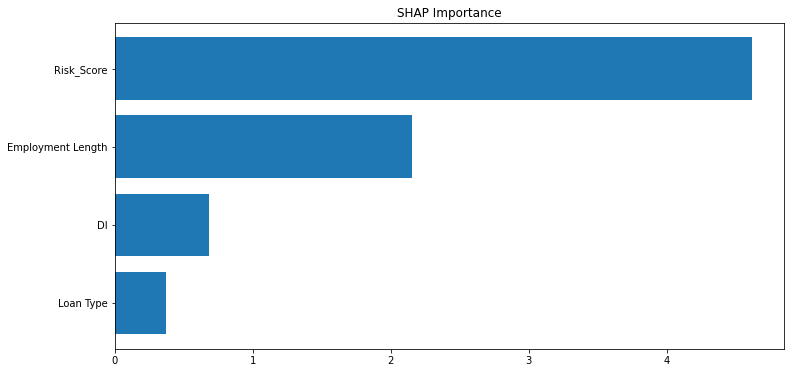

In [35]:
explainer = shap.Explainer(cb)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance')

Text(0.5, 1.0, 'SHAP Importance')

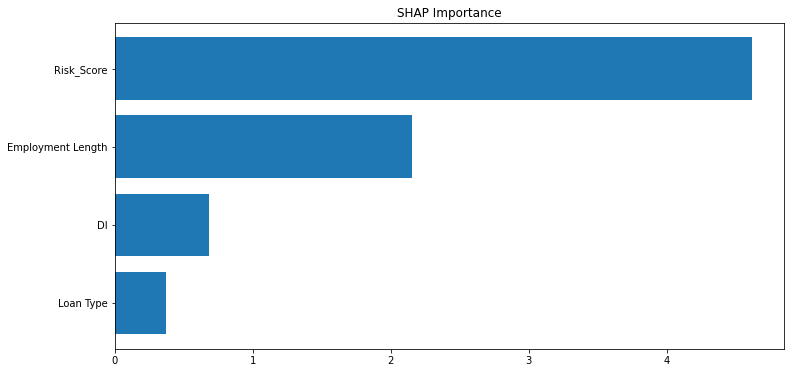

In [36]:
explainer = shap.Explainer(cb2)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance')

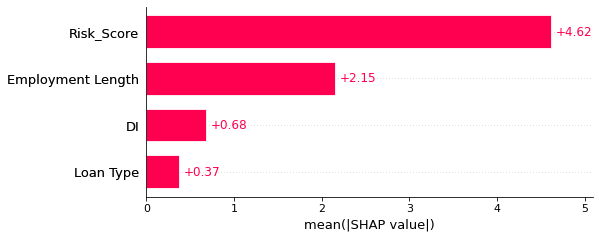

In [37]:
shap.plots.bar(shap_values, max_display=X_test.shape[0])

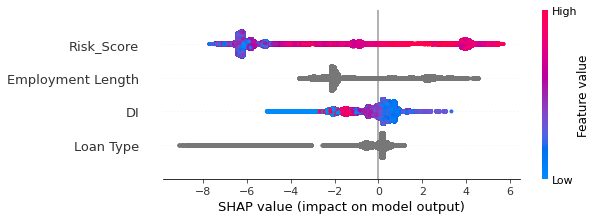

In [38]:
shap.summary_plot(shap_values, max_display=X_test.shape[0])